DATA SUMMARY

In [65]:
# Project Summary

In [45]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [46]:
# import tensorflow as tf
# print("GPU Available:", tf.test.is_gpu_available())

In [47]:
# # libraries for the files in google drive
# from pydrive.auth import GoogleAuth
# from google.colab import drive
# from pydrive.drive import GoogleDrive
# from google.colab import auth
# from oauth2client.client import GoogleCredentials
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier
from sklearn.model_selection import StratifiedKFold,KFold,GroupKFold
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score

In [48]:
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)

# # Replace 'file_id' with the actual file ID of your CSV file
# file_id = '1-2qx1Shn2NLcjsTtcjnbba-v4qNGHuZk'
# file_id2 = '1-EzON_NnR20m_L8wZUIIv0gKvHtZsLfh'
# file_id3 = '1-IK0JLZWRWsV1TKW-9lG1ZTr-4dPhcM-'
# file_id4 = '1-MBotSxQRfHSmB2rK8naP0-KQZIUjCPw'

# # Create a file instance using the file ID
# file = drive.CreateFile({'id': file_id})
# file.GetContentFile('train_data_dictionary.csv')
# file = drive.CreateFile({'id': file_id2})
# file.GetContentFile('train_data.csv')
# file = drive.CreateFile({'id': file_id3})
# file.GetContentFile('test_data.csv')
# file = drive.CreateFile({'id': file_id4})
# file.GetContentFile('sample_submission.csv')


# Read the CSV file using pandas
df_des = pd.read_csv('train_data_dictionary.csv')
df_train = pd.read_csv('train_data.csv')
df_test = pd.read_csv('test_data.csv')
df_submission = pd.read_csv('sample_sub.csv')


# Display the DataFrame
df_des

,Column,Description
0,case_id,Case_ID registered in Hospital
1,Hospital_code,Unique code for the Hospital
2,Hospital_type_code,Unique code for the type of Hospital
3,City_Code_Hospital,City Code of the Hospital
4,Hospital_region_code,Region Code of the Hospital
5,Available Extra Rooms in Hospital,Number of Extra rooms available in the Hospital
6,Department,Department overlooking the case
7,Ward_Type,Code for the Ward type
8,Ward_Facility_Code,Code for the Ward Facility
9,Bed Grade,Condition of Bed in the Ward


In [49]:

df_train.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [50]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

EXPLORATORY DATA ANALYSIS

In [51]:
df_train.describe()

,case_id,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Visitors with Patient,Admission_Deposit
count,318438.000000,318438.000000,318438.000000,318438.000000,318325.000000,318438.000000,313906.000000,318438.000000,318438.000000
mean,159219.500000,18.318841,4.771717,3.197627,2.625807,65747.579472,7.251859,3.284099,4880.749392
std,91925.276847,8.633755,3.102535,1.168171,0.873146,37979.936440,4.745266,1.764061,1086.776254
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1800.000000
25%,79610.250000,11.000000,2.000000,2.000000,2.000000,32847.000000,4.000000,2.000000,4186.000000
50%,159219.500000,19.000000,5.000000,3.000000,3.000000,65724.500000,8.000000,3.000000,4741.000000
75%,238828.750000,26.000000,7.000000,4.000000,3.000000,98470.000000,8.000000,4.000000,5409.000000
max,318438.000000,32.000000,13.000000,24.000000,4.000000,131624.000000,38.000000,32.000000,11008.000000


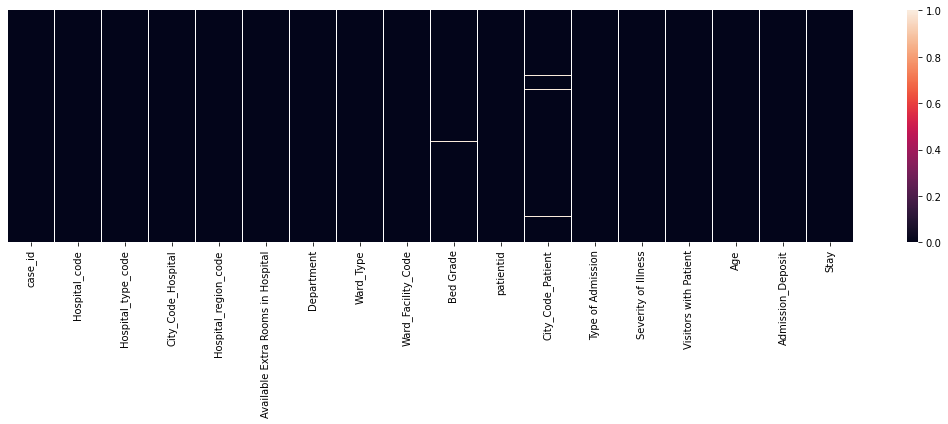

In [52]:
plt.figure(figsize=(15,6))
sns.heatmap(df_train.isna(),yticklabels=False)
plt.tight_layout()

In [53]:
df_train.isna().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                             113
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

In [54]:
df_train=df_train.dropna()

In [55]:
df_train=df_train.drop_duplicates()

In [56]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 313793 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            313793 non-null  int64  
 1   Hospital_code                      313793 non-null  int64  
 2   Hospital_type_code                 313793 non-null  object 
 3   City_Code_Hospital                 313793 non-null  int64  
 4   Hospital_region_code               313793 non-null  object 
 5   Available Extra Rooms in Hospital  313793 non-null  int64  
 6   Department                         313793 non-null  object 
 7   Ward_Type                          313793 non-null  object 
 8   Ward_Facility_Code                 313793 non-null  object 
 9   Bed Grade                          313793 non-null  float64
 10  patientid                          313793 non-null  int64  
 11  City_Code_Patient                  313793 no

In [57]:
df = pd.DataFrame()
df_train['train_or_test']='train'
df_test['train_or_test']='test'
df=pd.concat([df_train,df_test])
df

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay,train_or_test
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10,train
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50,train
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40,train
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50,train
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137052,455491,11,b,2,Y,4,anesthesia,Q,D,3.0,41160,3.0,Emergency,Minor,4,41-50,6313.0,NaN,test
137053,455492,25,e,1,X,2,radiotherapy,R,E,4.0,30985,7.0,Emergency,Moderate,2,0-10,3510.0,NaN,test
137054,455493,30,c,3,Z,2,anesthesia,R,A,4.0,81811,12.0,Urgent,Minor,2,0-10,7190.0,NaN,test
137055,455494,5,a,1,X,2,anesthesia,R,E,4.0,57021,10.0,Trauma,Minor,2,41-50,5435.0,NaN,test


In [58]:
# INPUT

hospital_type_map={
 'a': 0,
 'b': 1,
 'c': 2,
 'e': 3,
 'd': 4,
 'f': 5,
 'g': 6}

hospital_region_map = {'X': 0, 'Y': 1, 'Z': 2}

dep_map={'gynecology': 0,
 'anesthesia': 1,
 'radiotherapy': 2,
 'TB & Chest disease': 3,
 'surgery': 4}

ward_type_map ={'R': 0, 'Q': 1, 'S': 2, 'P': 3, 'T': 4, 'U': 5}
ward_fac_map ={'F':0, 'E': 1, 'D':2, 'C': 3, 'B': 4, 'A': 5}
admiss_map = {'Trauma': 0, 'Emergency': 1, 'Urgent': 2}

severity_map = {'Minor': 1,'Moderate': 2, 'Extreme': 3}
age_map = {'0-10': 5,
          '11-20': 15,
          '21-30': 25,
          '31-40': 35,
          '41-50': 45,
          '51-60': 55,
          '61-70': 65,
          '71-80': 75,
          '81-90': 85,
          '91-100': 95}

#OUTPUT
stay_map = {'21-30': 2,
 '11-20': 1,
 '31-40': 3,
 '51-60': 5,
 '0-10': 0,
 '41-50': 4,
 '71-80': 7,
 'More than 100 Days': 10,
 '81-90': 8,
 '91-100': 9,
 '61-70': 6}


In [59]:
df['Hospital_type_code'] = df['Hospital_type_code'].map(hospital_type_map)
df['Hospital_region_code'] = df['Hospital_region_code'].map(hospital_region_map)
df['Department'] = df['Department'].map(dep_map)
df['Ward_Type'] = df['Ward_Type'].map(ward_type_map)
df['Ward_Facility_Code'] = df['Ward_Facility_Code'].map(ward_fac_map)
df['Type of Admission'] = df['Type of Admission'].map(admiss_map)
df['Stay'] = df['Stay'].map(stay_map)
df['Severity of Illness'] = df['Severity of Illness'].map(severity_map)
df['Age'] = df['Age'].map(age_map)

In [60]:
df['mean_Admission_Deposit_per_illness']=df.groupby(['Severity of Illness'])['Admission_Deposit'].transform('mean')
df['mean_Admission_Deposit_per_admission']=df.groupby(['Type of Admission'])['Admission_Deposit'].transform('mean')
df['mean_Admission_Deposit_per_bed']=df.groupby(['Bed Grade'])['Admission_Deposit'].transform('mean')
df['mean_Admission_Deposit_per_department']=df.groupby(['Department'])['Admission_Deposit'].transform('mean')
df['mean_Admission_Deposit_per_hosp']=df.groupby(['Hospital_code'])['Admission_Deposit'].transform('mean')

In [61]:
df['sum_Admission_Deposit_per_illness']=df.groupby(['Severity of Illness'])['Admission_Deposit'].transform('sum')
df['sum_Admission_Deposit_per_admission']=df.groupby(['Type of Admission'])['Admission_Deposit'].transform('sum')
df['sum_Admission_Deposit_per_bed']=df.groupby(['Bed Grade'])['Admission_Deposit'].transform('sum')
df['sum_Admission_Deposit_per_department']=df.groupby(['Department'])['Admission_Deposit'].transform('sum')
df['sum_Admission_Deposit_per_hosp']=df.groupby(['Hospital_code'])['Admission_Deposit'].transform('sum')

In [62]:
df['max_Admission_Deposit_per_illness']=df.groupby(['Severity of Illness'])['Admission_Deposit'].transform('max')
df['max_Admission_Deposit_per_admission']=df.groupby(['Type of Admission'])['Admission_Deposit'].transform('max')
df['max_Admission_Deposit_per_bed']=df.groupby(['Bed Grade'])['Admission_Deposit'].transform('max')
df['max_Admission_Deposit_per_department']=df.groupby(['Department'])['Admission_Deposit'].transform('max')
df['max_Admission_Deposit_per_hosp']=df.groupby(['Hospital_code'])['Admission_Deposit'].transform('max')

In [63]:
df['min_Admission_Deposit_per_illness']=df.groupby(['Severity of Illness'])['Admission_Deposit'].transform('min')
df['min_Admission_Deposit_per_admission']=df.groupby(['Type of Admission'])['Admission_Deposit'].transform('min')
df['min_Admission_Deposit_per_bed']=df.groupby(['Bed Grade'])['Admission_Deposit'].transform('min')
df['min_Admission_Deposit_per_department']=df.groupby(['Department'])['Admission_Deposit'].transform('min')
df['min_Admission_Deposit_per_hosp']=df.groupby(['Hospital_code'])['Admission_Deposit'].transform('min')

In [64]:
df['illness_count']=df.groupby('Hospital_code')['Severity of Illness'].transform('count')
df['bed_count']=df.groupby('Hospital_code')['Bed Grade'].transform('count')
df['room_count']=df.groupby('Hospital_code')['Available Extra Rooms in Hospital'].transform('count')
df['Department_count']=df.groupby('Hospital_code')['Department'].transform('count')
df['ward_count']=df.groupby('Hospital_code')['Ward_Type'].transform('count')
df['TOA_count']=df.groupby('Hospital_code')['Type of Admission'].transform('count')

In [65]:
df['mean_Admission_Deposit_per_patient_hosp']=df.groupby(['patientid','Hospital_code'])['Admission_Deposit'].transform('mean')
df['sum_Admission_Deposit_per_patient_hosp']=df.groupby(['patientid','Hospital_code'])['Admission_Deposit'].transform('sum')
df['max_Admission_Deposit_per_patient_hosp']=df.groupby(['patientid','Hospital_code'])['Admission_Deposit'].transform('max')
df['min_Admission_Deposit_per_patient_hosp']=df.groupby(['patientid','Hospital_code'])['Admission_Deposit'].transform('min')

In [66]:
df['mean_Visitors with Patient_per_patient']=df.groupby(['patientid'])['Visitors with Patient'].transform('mean')
df['sum_Visitors with Patient_per_patient']=df.groupby(['patientid'])['Visitors with Patient'].transform('sum')
df['max_Visitors with Patient_per_patient']=df.groupby(['patientid'])['Visitors with Patient'].transform('max')
df['min_Visitors with Patient_per_patient']=df.groupby(['patientid'])['Visitors with Patient'].transform('min')

In [67]:
df['unique_hospital_visited']=df.groupby('patientid')['Hospital_code'].transform('nunique')
df['unique_hospitaltype_visited']=df.groupby('patientid')['Hospital_type_code'].transform('nunique')
df['count_visited_same_hospital']=df.groupby(['patientid','Hospital_code'])['Hospital_code'].transform('count')

df['mean_Admission_Deposit_per_patient']=df.groupby(['patientid'])['Admission_Deposit'].transform('mean')
df['sum_Admission_Deposit_per_patient']=df.groupby(['patientid'])['Admission_Deposit'].transform('sum')
df['max_Admission_Deposit_per_patient']=df.groupby(['patientid'])['Admission_Deposit'].transform('max')
df['min_Admission_Deposit_per_patient']=df.groupby(['patientid'])['Admission_Deposit'].transform('min')

df['mean_visitors_per_patient']=df.groupby(['patientid'])['Visitors with Patient'].transform('mean')
df['unique city']=df.groupby('patientid')['City_Code_Hospital'].transform('nunique')
df['unique illness type']=df.groupby('patientid')['Severity of Illness'].transform('nunique')
df['unique admission type']=df.groupby('patientid')['Type of Admission'].transform('nunique')

df['mean_Admission_Deposit_per_patient_in_same_hospital']=df.groupby(['patientid','Hospital_code'])['Admission_Deposit'].transform('mean')

In [68]:
df['total_no_of_patients_in_hospital']=df.groupby('Hospital_code')['patientid'].transform('count')
df['total_no_of_patients_in_hospital_from_same_city']=df.groupby(['Hospital_code','City_Code_Patient'])['patientid'].transform('count')
df['total_no_of_patients_in_patientcity']=df.groupby('City_Code_Patient')['patientid'].transform('count')
df['total_no_of_patients_in_hospitalcity']=df.groupby('City_Code_Hospital')['patientid'].transform('count')

In [69]:
df['number_of_time_patient_visited']=df.groupby('patientid')['patientid'].transform('count')
df['Total_Hospitals_in_city']=df.groupby('City_Code_Hospital')['Hospital_code'].transform('nunique')
df['Total_Hospitals_in_city_of_same_type']=df.groupby(['City_Code_Hospital','Hospital_type_code'])['Hospital_code'].transform('nunique')

In [70]:
df['total_no_of_patients_per_Department']=df.groupby('Department')['patientid'].transform('count')
df['total_no_of_patients_per_Severity of Illness']=df.groupby('Severity of Illness')['patientid'].transform('count')
df['Total_Hospitals_in_region']=df.groupby('Hospital_region_code')['patientid'].transform('count')
df['total_no_of_patients_in_hospitalward']=df.groupby(['Hospital_code','Ward_Type'])['patientid'].transform('count')
df['total_no_of_patients_in_hospitaldepartment']=df.groupby(['Hospital_code','Department'])['patientid'].transform('count')
df['total_no_of_patients_in_hospitalBedGrade']=df.groupby(['Hospital_code','Bed Grade'])['patientid'].transform('count')
df['total_no_of_patients_in_hospitalSeverityofIllness']=df.groupby(['Hospital_code','Type of Admission'])['patientid'].transform('count')
df['unique_patientcity_in_hospital']=df.groupby('Hospital_code')['City_Code_Patient'].transform('nunique')
df['Average_deposit']=df.groupby('Hospital_code')['Available Extra Rooms in Hospital'].transform('mean')
df['Total_Hospitals_in_patientcity']=df.groupby('City_Code_Patient')['Hospital_code'].transform('nunique')
df['Total_Hospitals_in_region']=df.groupby('Hospital_region_code')['Hospital_code'].transform('nunique')

In [71]:
df["RANK"] = df.groupby("patientid")['patientid'].rank(method="first", ascending=True)
df["RANK_avg"] = df.groupby("patientid")['patientid'].rank(method="average", ascending=True)
df["RANK_max"] = df.groupby("patientid")['patientid'].rank(method="max", ascending=True)
df["RANK_min"] = df.groupby("patientid")['patientid'].rank(method="min", ascending=True)
df["RANK_DIFF"] = df['RANK_max'] - df['RANK_min']
df["RANK_Type_Admission"] = df.groupby(['patientid','Type of Admission'])['patientid'].rank(method='first',ascending=True)
df["RANK_Type_City_Code"] = df.groupby(['patientid','City_Code_Hospital'])['patientid'].rank(method='first',ascending=True)
df["RANK_Type_hosp_Code"] = df.groupby(['patientid','Hospital_code'])['patientid'].rank(method='first',ascending=True)
df["RANK_Type_hosp_type_Code"] = df.groupby(['patientid','Hospital_type_code'])['patientid'].rank(method='first',ascending=True)
df["RANK_Type_rooms"] = df.groupby(['patientid','Available Extra Rooms in Hospital'])['patientid'].rank(method='first',ascending=True)
df["RANK_Type_Department"] = df.groupby(['patientid','Department'])['patientid'].rank(method='first',ascending=True)
df["RANK_Type_Ward_Type"] = df.groupby(['patientid','Ward_Type'])['patientid'].rank(method='first',ascending=True)
df["RANK_Type_Ward_Facility_Code"] = df.groupby(['patientid','Ward_Facility_Code'])['patientid'].rank(method='first',ascending=True)
df["RANK_Type_Hospital_region_code"] = df.groupby(['patientid','Hospital_region_code'])['patientid'].rank(method='first',ascending=True)
df['Rank_City_Code_Patient'] = df.groupby(['patientid','City_Code_Patient'])['patientid'].rank(method='first',ascending=True)
df['Rank_City_Code_Vist'] = df.groupby(['patientid','Visitors with Patient'])['patientid'].rank(method='first',ascending=True)
df['Rank_ill+admiss'] = df.groupby(['patientid','Type of Admission','Severity of Illness'])['patientid'].rank(method='first',ascending=True)
df['Rank_ill+admiss_max'] = df.groupby(['patientid','Type of Admission','Severity of Illness'])['patientid'].rank(method='max',ascending=True)
df['Rank_ill+admiss_min'] = df.groupby(['patientid','Type of Admission','Severity of Illness'])['patientid'].rank(method='min',ascending=True)
df['Rank_ill+admiss_avg'] = df.groupby(['patientid','Type of Admission','Severity of Illness'])['patientid'].rank(method='average',ascending=True)
df['Rank_ill+admiss_diff'] = df['Rank_ill+admiss_max'] - df['Rank_ill+admiss_min']
cols_rank = ['Type of Admission','City_Code_Hospital','Hospital_code','Hospital_type_code','Available Extra Rooms in Hospital','Department','Ward_Type','Ward_Facility_Code',
             'Hospital_region_code','City_Code_Patient','Visitors with Patient']
for i in cols_rank:
    df[f"RANK_{i}_min"] = df.groupby(['patientid',i])['patientid'].rank(method='min',ascending=True)
    df[f"RANK_{i}_max"] = df.groupby(['patientid',i])['patientid'].rank(method='max',ascending=True)
    df[f"RANK_{i}_avg"] = df.groupby(['patientid',i])['patientid'].rank(method='average',ascending=True)
    df[f'diff_{i}_max_min'] = df[f"RANK_{i}_max"] -  df[f"RANK_{i}_min"]

<ipython-input-71-7d42b742e258>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Rank_ill+admiss_avg'] = df.groupby(['patientid','Type of Admission','Severity of Illness'])['patientid'].rank(method='average',ascending=True)
<ipython-input-71-7d42b742e258>:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Rank_ill+admiss_diff'] = df['Rank_ill+admiss_max'] - df['Rank_ill+admiss_min']
<ipython-input-71-7d42b742e258>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert

<ipython-input-71-7d42b742e258>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"RANK_{i}_min"] = df.groupby(['patientid',i])['patientid'].rank(method='min',ascending=True)
<ipython-input-71-7d42b742e258>:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"RANK_{i}_max"] = df.groupby(['patientid',i])['patientid'].rank(method='max',ascending=True)
<ipython-input-71-7d42b742e258>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perform

<ipython-input-71-7d42b742e258>:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"RANK_{i}_max"] = df.groupby(['patientid',i])['patientid'].rank(method='max',ascending=True)
<ipython-input-71-7d42b742e258>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"RANK_{i}_avg"] = df.groupby(['patientid',i])['patientid'].rank(method='average',ascending=True)
<ipython-input-71-7d42b742e258>:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor per

In [72]:
df = df.dropna()

In [73]:
train=df.loc[df.train_or_test.isin(['train'])]
test=df.loc[df.train_or_test.isin(['test'])]
train.drop(columns={'train_or_test'},axis=1,inplace=True)
test.drop(columns={'train_or_test'},axis=1,inplace=True)

<ipython-input-73-387217488018>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop(columns={'train_or_test'},axis=1,inplace=True)


In [74]:
x=train.drop(columns={'case_id','Stay'},axis=1)
y=train.loc[:,['Stay']]
test=test.drop(columns={'case_id','Stay'},axis=1)

In [75]:
%%time
err = []
y_pred_tot_lgm = np.zeros((len(test), 11))


fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=2020)
i = 1

for train_index, test_index in fold.split(x, y):
    x_train, x_val = x.iloc[train_index], x.iloc[test_index]
    y_train, y_val = y.iloc[train_index], y.iloc[test_index]
    m = CatBoostClassifier(n_estimators=10000,
                       random_state=2020,
                       eval_metric='Accuracy',
                       learning_rate=0.08,
                       depth=8,
                       bagging_temperature=0.3,
                       task_type='GPU'
                       #num_leaves=64

                       )
    m.fit(x_train, y_train,eval_set=[(x_val, y_val)], early_stopping_rounds=100,verbose=200)
    pred_y = m.predict(x_val)
    print(i, " err_lgm: ", accuracy_score(y_val,pred_y))
    err.append(accuracy_score(y_val,pred_y))
#     y_pred_tot_lgm+= m.predict_proba(test)
    i = i + 1
# y_pred_tot_lgm=y_pred_tot_lgm/10
sum(err)/10

0:	learn: 0.3816361	test: 0.3826960	best: 0.3826960 (0)	total: 93.3ms	remaining: 15m 32s
200:	learn: 0.4561192	test: 0.4340663	best: 0.4343212 (198)	total: 16.3s	remaining: 13m 16s
400:	learn: 0.4763945	test: 0.4370618	best: 0.4378266 (389)	total: 31.7s	remaining: 12m 37s
600:	learn: 0.4962874	test: 0.4408222	best: 0.4410771 (593)	total: 47s	remaining: 12m 14s
800:	learn: 0.5145301	test: 0.4420013	best: 0.4423837 (752)	total: 1m 2s	remaining: 11m 57s
bestTest = 0.4428298279
bestIteration = 818
Shrink model to first 819 iterations.
1  err_lgm:  0.44282982791587
0:	learn: 0.3819442	test: 0.3786170	best: 0.3786170 (0)	total: 80.9ms	remaining: 13m 28s
200:	learn: 0.4556306	test: 0.4376354	best: 0.4383047 (197)	total: 16.3s	remaining: 13m 14s
400:	learn: 0.4761431	test: 0.4415233	best: 0.4419694 (376)	total: 31.4s	remaining: 12m 30s
bestTest = 0.4419694073
bestIteration = 376
Shrink model to first 377 iterations.
2  err_lgm:  0.4419694072657744
0:	learn: 0.3815759	test: 0.3831103	best: 0.38

0.44219598298732715

In [76]:
import joblib
model_filename = 'CBC_full_2.pkl'
joblib.dump(m, model_filename)

['CBC_full_2.pkl']

In [77]:
%%time
err = []
y_pred_tot_extra_trees = np.zeros((len(test), 11))  # Corrected array name

fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=2020)
i = 1

for train_index, test_index in fold.split(x, y):
    x_train, x_val = x.iloc[train_index], x.iloc[test_index]
    y_train, y_val = y.iloc[train_index], y.iloc[test_index]

    # Convert y_train to a 1-dimensional array using ravel()
    y_train = y_train.values.ravel()

    m3 = ExtraTreesClassifier(n_estimators=300, max_depth=20,n_jobs=-1)
    m3.fit(x_train, y_train)
    pred_y = m3.predict(x_val)
    y_val = y_val.values.ravel()
    print(i, " err_extra_trees: ", accuracy_score(y_val, pred_y))
    err.append(accuracy_score(y_val, pred_y))
#     y_pred_tot_extra_trees += m3.predict_proba(test)
    i += 1
# y_pred_tot_extra_trees = y_pred_tot_extra_trees / 10
sum(err) / 10


1  err_extra_trees:  0.4144359464627151
2  err_extra_trees:  0.41504142766093055
3  err_extra_trees:  0.4149776927979605
4  err_extra_trees:  0.41374804805761817
5  err_extra_trees:  0.4151502597278435
6  err_extra_trees:  0.4178909461741929
7  err_extra_trees:  0.4164887345039676
8  err_extra_trees:  0.4124414417285446
9  err_extra_trees:  0.4184645782211033
10  err_extra_trees:  0.4152458650689952
Wall time: 21min 30s


0.4153884940403872

In [78]:
import joblib
model_filename = 'ET_full2.pkl'
joblib.dump(m3, model_filename)

['ET_full2.pkl']

In [79]:
%%time
err = []
y_pred_tot_rf = np.zeros((len(test), 11))  # Corrected array name

fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=2020)
i = 1

for train_index, test_index in fold.split(x, y):
    x_train, x_val = x.iloc[train_index], x.iloc[test_index]
    y_train, y_val = y.iloc[train_index], y.iloc[test_index]
    
    # Convert y_train to a 1-dimensional array using ravel()
    y_train = y_train.values.ravel()
    
    m2 = RandomForestClassifier(n_estimators=300,
                       max_depth=20,
                       max_features='sqrt',  # Change to 'sqrt'
                       n_jobs=-1)
    m2.fit(x_train, y_train)
    pred_y = m2.predict(x_val)
    print(i, " err_rf: ", accuracy_score(y_val, pred_y))
    err.append(accuracy_score(y_val, pred_y))
#     y_pred_tot_rf += m2.predict_proba(test) 
    i = i + 1
# y_pred_tot_rf = y_pred_tot_rf / 10
sum(err) / 10


1  err_rf:  0.43448056086679415
2  err_rf:  0.43569152326322497
3  err_rf:  0.4380815806246017
4  err_rf:  0.4338889065935817


KeyboardInterrupt: 

In [80]:
import joblib
model_filename = 'RF_full2.pkl'
joblib.dump(m2, model_filename)

['RF_full2.pkl']

In [ ]:
%%time
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
err = []
y_pred_tot_rf = np.zeros((len(test), 11))  # Corrected array name

fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=2020)
i = 1

for train_index, test_index in fold.split(x, y):
    x_train, x_val = x.iloc[train_index], x.iloc[test_index]
    y_train, y_val = y.iloc[train_index], y.iloc[test_index]
    
    # Convert y_train to a 1-dimensional array using ravel()
    y_train = to_categorical(y_train, num_classes=11)
    y_val= to_categorical(y_val, num_classes=11)
    
    
    m4 = Sequential()
    m4.add(Dense(128, input_dim=x_train.shape[1], activation='relu'))
    m4.add(Dense(256, activation='relu'))
    m4.add(Dropout(0.2)) 
    m4.add(Dense(512, activation='relu'))
    m4.add(Dropout(0.4))
    m4.add(Dense(11, activation='softmax'))
    m4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'],)
    
    estimator = KerasClassifier(model=m4, epochs=10, batch_size=50000, verbose=0)
    results = cross_val_score(estimator, x_train, y_train, verbose = 1, 
                          fit_params={'validation_data': (x_val, y_val)}, n_jobs=-1)
    estimator.fit(x_train, y_train)
    pred_y = estimator.predict(x_val)
    print(i, " err_rf: ", accuracy_score(y_val, pred_y))
    err.append(accuracy_score(y_val, pred_y))
#     y_pred_tot_rf += m2.predict_proba(test) 
    i = i + 1
# y_pred_tot_rf = y_pred_tot_rf / 10
sum(err) / 10


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


INFO:tensorflow:Assets written to: C:\Users\naikss\AppData\Local\Temp\tmph3fzuxtb\assets


INFO:tensorflow:Assets written to: C:\Users\naikss\AppData\Local\Temp\tmph3fzuxtb\assets


INFO:tensorflow:Assets written to: C:\Users\naikss\AppData\Local\Temp\tmpt4rhnp_l\assets


INFO:tensorflow:Assets written to: C:\Users\naikss\AppData\Local\Temp\tmpt4rhnp_l\assets


INFO:tensorflow:Assets written to: C:\Users\naikss\AppData\Local\Temp\tmpcgmi_v7s\assets


INFO:tensorflow:Assets written to: C:\Users\naikss\AppData\Local\Temp\tmpcgmi_v7s\assets


INFO:tensorflow:Assets written to: C:\Users\naikss\AppData\Local\Temp\tmpwiq35ur8\assets


INFO:tensorflow:Assets written to: C:\Users\naikss\AppData\Local\Temp\tmpwiq35ur8\assets


INFO:tensorflow:Assets written to: C:\Users\naikss\AppData\Local\Temp\tmp7uhp6vll\assets


INFO:tensorflow:Assets written to: C:\Users\naikss\AppData\Local\Temp\tmp7uhp6vll\assets


INFO:tensorflow:Assets written to: C:\Users\naikss\AppData\Local\Temp\tmptliu_clv\assets


INFO:tensorflow:Assets written to: C:\Users\naikss\AppData\Local\Temp\tmptliu_clv\assets


INFO:tensorflow:Assets written to: C:\Users\naikss\AppData\Local\Temp\tmp9lytwef8\assets


INFO:tensorflow:Assets written to: C:\Users\naikss\AppData\Local\Temp\tmp9lytwef8\assets


INFO:tensorflow:Assets written to: C:\Users\naikss\AppData\Local\Temp\tmpx2y_zohs\assets


INFO:tensorflow:Assets written to: C:\Users\naikss\AppData\Local\Temp\tmpx2y_zohs\assets


INFO:tensorflow:Assets written to: C:\Users\naikss\AppData\Local\Temp\tmptuf3rtud\assets


INFO:tensorflow:Assets written to: C:\Users\naikss\AppData\Local\Temp\tmptuf3rtud\assets


INFO:tensorflow:Assets written to: C:\Users\naikss\AppData\Local\Temp\tmpocq3pmh1\assets


INFO:tensorflow:Assets written to: C:\Users\naikss\AppData\Local\Temp\tmpocq3pmh1\assets


In [ ]:
import joblib
model_filename = 'NN_full2.pkl'
joblib.dump(m4, model_filename)